## RAG - Retrieval Augmented Generation

Retrieval Augmented Generation is the technique of retrieving relevant information from an external source, augmenting the input to the LLM with that external information, thereby enabling the LLM to generate a response that is contextual, reliable,
and factually accurate.

It overcomes the limitations of LLMs by
providing them with previously unknown information and, consequently, enhances
the overall memory of the system

### First of all Why do we need RAG ?
1. LLMs are not trained for facts
2. Knowledge Cut-off Date
3. Hallucinations
4. Knowledge Limitation

### The Novelty of RAG

1. Make LLMs respond with up-to-date information
2. Make LLMs respond with factually accurate information
3. Make LLMs aware of proprietary information

### Advantages of RAG
1. Deep Contextual awareness
2. Source citation
3. Lesser hallucination



### Popular RAG use cases
1. Search Engine Experience
2. Personalized marketing content generation
3. Real-time event documentary
4. Conversational agents
5. Document question answering system
6. Virtual assistants
7. AI-powered search
8. Social media monitoring and sentiment analysis
9. News generation and content curation


## Chunking process

The chunking process can be divided into three steps, as illustrated:
1. Divide the longer text into compact, meaningful units (e.g., sentences or paragraphs).
2. Merge the smaller units into larger chunks until a specific size is achieved. After that, this chunk is treated as an independent segment of text.
3. When creating a new chunk, include a part of the previous chunk at the start of 
the new chunk. This overlap is necessary to maintain contextual continuity

This process is also known as "small to big" chunking.

While splitting documents into chunks might sound like a simple concept, multiple methods can be employed to execute chunking. The following two aspects vary across the chunking methodologies:
1. The manner of text splitting
2. Measuring of the chunk size


### Fixed-size chunking

1. Split by character 
2. Recursive split by character


### Specialised Chunking

Chunking is carried out depending on the structure of the input

### Semantic Chunking

Chunking preserves the semantic integrity or meaning of the input

## What are vector embeddings?

Vector embeddings map real-world entities, such as a word, a sentence, or even an image, into vector representations or a point in vector space.

**Key Idea:** Points in the vector space that are similar to each other in some way have a similar **semantic meaning**.

Word-embedding models: Word2Vec, GloVe, others.

These word embedding vectors behave like vectors in a vector space, so we can perform algebraic equations and operations.

Example: Embedding(King) - Embedding(Man) + Embedding(Woman) is closest to Embedding(Queen).
**Note:** Not Exact, but **closest**.

The main property of word embeddings that is in effect here is that the two axes (vertical and horizontal) represent different things.

A good word embedding would be able to capture not only age and size, but also many more features of the words. Since each feature is one new axis, or coordinate, a good embedding must have many more than two coordinates assigned to every word.

Similar to word embeddings, there are **Sentence Embeddings**.
Dense vector representations of sentences that capture their semantic meaning.

### Embedding vectors in other domains

1. Image embeddings translate visual content into a vector form.

2. Video embeddings capture the characteristics of video data, including visual appearance and temporal dynamics.

3. Audio embeddings represent sound signals in a vector space.

4. Graph embeddings convert nodes, edges, and their features in a graph into vector space, preserving structural information.

5. Shared embedding spaces: For example, CLIP which generates embeddings for both text and images.

### Applications of Embeddings

LLMs: Input tokens are converted to token embeddings.

Semantic Search: Enhances search engines by retrieving sentences with similar meanings, improving search relevance.

RAG: Sentence embeddings enable efficient retrieval of relevant chunks.

Recommendations: Representing products in embedding space and using similarity search.

Anomaly Detection: Identifies patterns in data that deviate significantly from the norm.

## What are embedding models?

These vectors have an amazing ability to capture the meaning of a word or phrase.
Ex - King - Man + Woman = Queen

Creating a model that can produce a vector representing the meaning of a word is a challenging problem.

We make use of a large volume of existing text as training data.

How do we go about doing that?

Take the word "tree".
One sentence might say: "The leaves on the tree are green."
Another sentence might say: "The branches on the tree are dropping."

So the words near the word "tree" tell you something about what "tree" means.
Having a million sentences like these where the word "tree" occurs will give us a good sense of what the word "tree" means.

This approach was made popular by the model Word2Vec.
Popular variants:
1. Continuous Bag of Words
2. Skip Grams

Shortly after, a new approach called GloVe further improved Word2Vec.
You can also go beyond words to longer chunks of text, like phrases or sentences

## Word Embeddings Demonstration

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import gensim.downloader as api

word_vectors = api.load('glove-wiki-gigaword-100')
#word_vectors = api.load('word2vec-google-news-300')

In [20]:
word_vectors['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [4]:
word_vectors['king'].shape

(100,)

In [5]:
word_vectors['king'][:20]

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 ], dtype=float32)

In [21]:
# Words to visualize
words = ["king", "princess", "monarch", "throne", "crown", "man","woman",
         "mountain", "ocean", "tv", "rainbow", "cloud", "queen","spain","madrid","italy","rome"]

# Get word vectors
vectors = np.array([word_vectors[word] for word in words])

In [7]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

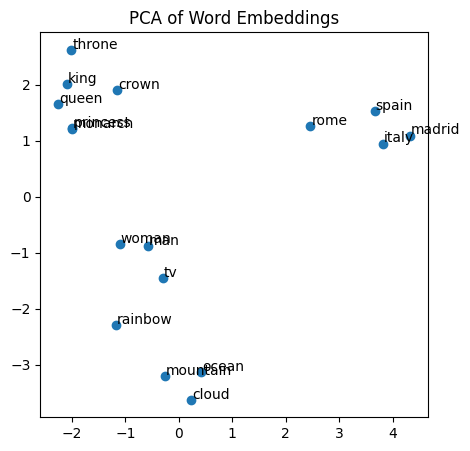

In [8]:
# Plotting
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca[:, 0], vectors_pca[:, 1])
for i, word in enumerate(words):
    axes.annotate(word, (vectors_pca[i, 0]+.02, vectors_pca[i, 1]+.02))
axes.set_title('PCA of Word Embeddings')
plt.show()

In [9]:
result = word_vectors.most_similar(positive=['king', 'woman'],
                                   negative=['man'], topn=1)

# Output the result
print(f"""
    The word closest to 'king' - 'man' + 'woman' is: '{result[0][0]}'
    with a similarity score of {result[0][1]}""")


    The word closest to 'king' - 'man' + 'woman' is: 'queen'
    with a similarity score of 0.7698541283607483


In [10]:
result_2=word_vectors.most_similar(positive=['paris','spain'],negative=['france'],topn=1)
print(f"""
    The word closest is: '{result_2[0][0]}'
    with a similarity score of {result_2[0][1]}""")


    The word closest is: 'madrid'
    with a similarity score of 0.8061118125915527


## GloVe vs BERT: words in context

In [11]:
tokenizer = BertTokenizer.from_pretrained('google-bert/bert-base-uncased')
model = BertModel.from_pretrained('google-bert/bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(sentence, word):
    inputs = tokenizer(sentence, return_tensors='pt')
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    word_tokens = tokenizer.tokenize(sentence)
    word_index = word_tokens.index(word)
    word_embedding = last_hidden_states[0, word_index + 1, :]  # +1 to account for [CLS] token
    return word_embedding

In [12]:
# sentence1 = "I swam accross the river to get to the other bank"
# sentence2 = "I walked across the road to get cash from the bank"


sentence1="The footballer prepared to step onto the pitch for the final match."
sentence2="The salesman delivered a flawless pitch to secure the contract."

word = "pitch"

bert_embedding1 = get_bert_embeddings(sentence1, word).detach().numpy()
bert_embedding2 = get_bert_embeddings(sentence2, word).detach().numpy()
word_embedding = word_vectors[word]

In [13]:
print("BERT Embedding for 'pitch' in sentence 1:", bert_embedding1[:5])
print("BERT Embedding for 'pitch' in sentence 2:", bert_embedding2[:5])
print("GloVe Embedding for 'pitch':", word_embedding[:5])

bert_similarity = cosine_similarity([bert_embedding1], [bert_embedding2])[0][0]
word_embedding_similarity = cosine_similarity([word_embedding], [word_embedding])[0][0]

print()
print(f"Cosine Similarity between BERT embeddings in different contexts: {bert_similarity}")
print(f"Cosine Similarity between GloVe embeddings: {word_embedding_similarity}")


BERT Embedding for 'pitch' in sentence 1: [ 0.15121952 -0.2960958   0.22355284 -0.78512406 -0.14569744]
BERT Embedding for 'pitch' in sentence 2: [ 0.5382779  -0.4917949   0.14126457 -0.07027287  0.2668616 ]
GloVe Embedding for 'pitch': [-0.32843  0.41796  0.39754  0.25849 -1.2771 ]

Cosine Similarity between BERT embeddings in different contexts: 0.43256038427352905
Cosine Similarity between GloVe embeddings: 1.0


In [14]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L6-v2', max_length=512,
                     default_activation_function=torch.nn.Sigmoid())

The CrossEncoder `default_activation_function` argument was renamed and is now deprecated, please use `activation_fn` instead.


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

In [15]:
question = "Where is the capital of France?"
# Define sentences to compare
answers = [
    "Paris is the capital of France.",
    "Berlin is the capital of Germany.",
    "Madrid is the capital of Spain."
]

In [16]:
scores = model.predict([(question, answers[0]), (question, answers[1]),
                        (question, answers[2])])
print(scores)
most_relevant_idx = torch.argmax(torch.tensor(scores)).item()
print(f"The most relevant passage is: {answers[most_relevant_idx]}")

[0.99965715 0.05289631 0.04520693]
The most relevant passage is: Paris is the capital of France.


### Sentence embeddings work better

### Make your own embedding using Pytorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

# --- Data Loading and Preprocessing (No changes needed here) ---
# Load data – training and test
train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_ds  = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Normalize and reshape
x_tr = train_ds.data.numpy().astype('float32') / 255.0  # (N, 28, 28)
y_tr = train_ds.targets.numpy().astype('int64')          # (N,)
x_te = test_ds.data.numpy().astype('float32') / 255.0  # (N, 28, 28)
y_te = test_ds.targets.numpy().astype('int64')          # (N,)

# Flatten
x_tr_flat = x_tr.reshape(-1, 784)
x_te_flat = x_te.reshape(-1, 784)
print("Original data shapes:", x_tr.shape, x_te.shape)
print("Flattened data shapes:", x_tr_flat.shape, x_te_flat.shape)

# Neural Network Parameters
batch_size, n_epoch = 100, 50
n_hidden, z_dim = 256, 2

# --- Model Definition (Corrected) ---

# Sampling function (reparameterization trick)
def sampling(mu, log_var):
    """
    Samples from a Gaussian distribution using the reparameterization trick.
    """
    eps = torch.randn_like(mu)
    std = torch.exp(0.5 * log_var)
    return mu + std * eps

# Encoder - from 784 -> 256 -> 128 -> 128 -> 32
class Encoder(nn.Module):
    def __init__(self, input_dim=784, n_hidden=256, z_dim=32):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_hidden // 2)
        # This layer was defined in your original code but not used.
        self.fc3 = nn.Linear(n_hidden // 2, n_hidden // 2)
        self.mu = nn.Linear(n_hidden // 2, z_dim)
        self.log_var = nn.Linear(n_hidden // 2, z_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # *** FIX: The logical flaw was here. The fc3 layer was never called. ***
        x = F.relu(self.fc3(x))
        mu = self.mu(x)
        log_var = self.log_var(x)
        z = sampling(mu, log_var)
        return z, mu, log_var

# Decoder - from 32 -> 128 -> 128 -> 256 -> 784
class Decoder(nn.Module):
    def __init__(self, output_dim=784, n_hidden=256, z_dim=32):
        super().__init__()
        self.fc1 = nn.Linear(z_dim, n_hidden // 2)
        # *** FIX: Added a layer to make the Decoder symmetric with the Encoder. ***
        # Your original code had a syntax error and an asymmetric architecture.
        self.fc2 = nn.Linear(n_hidden // 2, n_hidden // 2)
        self.fc3 = nn.Linear(n_hidden // 2, n_hidden)
        self.out = nn.Linear(n_hidden, output_dim)

    def forward(self, z):
        x = F.relu(self.fc1(z))
        # *** FIX: Using the corrected, deeper, and symmetric architecture. ***
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        y = torch.sigmoid(self.out(x))
        return y

# Variational Autoencoder wrapper
class VAE(nn.Module):
    def __init__(self, input_dim=784, n_hidden=256, z_dim=32):
        super().__init__()
        self.encoder = Encoder(input_dim=input_dim, n_hidden=n_hidden, z_dim=z_dim)
        self.decoder = Decoder(output_dim=input_dim, n_hidden=n_hidden, z_dim=z_dim)

    def forward(self, x):
        z, mu, log_var = self.encoder(x)
        recon = self.decoder(z)
        return recon, mu, log_var, z

# --- Loss Function (No changes needed) ---
def vae_loss(inputs, outputs, mu, log_var):
    bsz = inputs.size(0)
    recon_sum = F.binary_cross_entropy(outputs, inputs, reduction='sum')
    kl_sum = 0.5 * torch.sum(mu.pow(2) + torch.exp(log_var) - log_var - 1)
    loss = recon_sum + kl_sum
    return loss / bsz # Return mean loss per sample

# --- Training Loop (Simplified loss tracking) ---
model = VAE(input_dim=x_tr_flat.shape[1], n_hidden=n_hidden, z_dim=z_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_loader = DataLoader(TensorDataset(torch.from_numpy(x_tr_flat)), batch_size=batch_size, shuffle=True)
val_tensor = torch.from_numpy(x_te_flat)

print("\nStarting training...")
model.train()
for epoch in range(1, n_epoch + 1):
    total_train_loss = 0.0
    for (batch,) in train_loader:
        batch = batch.float()
        optimizer.zero_grad()
        outputs, mu, log_var, _ = model(batch)
        loss = vae_loss(batch, outputs, mu, log_var)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    # Validation
    with torch.no_grad():
        val_outputs, val_mu, val_log_var, _ = model(val_tensor)
        val_loss = vae_loss(val_tensor, val_outputs, val_mu, val_log_var)

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Epoch {epoch:02d} | train_loss={avg_train_loss:.4f} | val_loss={val_loss.item():.4f}")

# --- Evaluation and Plotting ---
print("\nTraining finished. Generating embeddings for the test set...")
model.eval()
with torch.no_grad():
    # We can get the latent representation directly from the encoder
    x_te_latent, _, _ = model.encoder(val_tensor)
    x_te_latent = x_te_latent.numpy()

plt.figure(figsize=(10, 8))
plt.scatter(x_te_latent[:, 0], x_te_latent[:, 1], c=y_te, cmap='viridis', alpha=0.7)
plt.colorbar(label='Digit Class')
plt.title('MNIST 2D Embeddings (Corrected Model)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Find indices for specific digits
zero_indices = np.where(y_te == 0)[0]
one_indices = np.where(y_te == 1)[0]

# Display first few zeros and ones
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(x_te_flat[zero_indices[0]].reshape(28, 28), cmap='gray')
plt.title(f'First Zero (index: {zero_indices[0]})')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(x_te_flat[zero_indices[1]].reshape(28, 28), cmap='gray')
plt.title(f'Second Zero (index: {zero_indices[1]})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(x_te_flat[one_indices[0]].reshape(28, 28), cmap='gray')
plt.title(f'First One (index: {one_indices[0]})')
plt.axis('off')

plt.tight_layout()
plt.show()

# calculate vectors for each digit
zero_A = x_te_latent[zero_indices[0]]
zero_B = x_te_latent[zero_indices[1]]
one = x_te_latent[one_indices[0]]

print(f"Embedding for the first ZERO is {zero_A}")
print(f"Embedding for the second ZERO is {zero_B}")
print(f"Embedding for the ONE is {one}")

## Matryoshka Embeddings

Read more about Matryoshka embeddings at: [Blog Post](https://huggingface.co/blog/matryoshka)

## Vector Database

A significant limitation of trained large language models (LLMs) is their lack of knowledge about recent events or proprietary data. To address this, we use Retrieval-Augmented Generation (RAG), with a vector database as a key component.

In this system, recent or proprietary data is stored in the vector database. When a query is made that requires this specific information, the query is sent to the vector database. It then retrieves the relevant data, which is subsequently added to the LLM's prompt. This provides the LLM with the necessary context to answer the question.

> Vector databases existed long before LLMs. They have been used in applications like semantic search and recommender systems.

**Understanding how vector databases work is crucial for choosing the right retrieval techniques, such as sparse, dense, or hybrid search. Similarly, knowledge of different similarity calculations helps in selecting the best distance algorithm.**


### Choosing a vector database
Important factors to be taken into consideration when choosing a vector database

1. Accuracy vs. speed
2. Flexibility vs. performance
3. Local vs. cloud storage
4. Direct access vs. API
5. Simplicity vs. advanced features
6. Cost

## Applications of Vector Database

## Semantic Search

In [22]:
import os
from dotenv import load_dotenv, find_dotenv
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec
import torch
from tqdm.auto import tqdm
import pandas as pd

# --- 1. Load Environment Variables ---
# This will load the .env file where your PINECONE_API_KEY is stored.
_ = load_dotenv(find_dotenv())
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")

if not PINECONE_API_KEY:
    raise ValueError("PINECONE_API_KEY not found in .env file. Please make sure it's set.")

# --- 2. Initialize Embedding Model ---
# Set device to CUDA if available, otherwise CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Replace the old model with Google's embeddinggemma-300m
print("Loading sentence transformer model: 'google/embeddinggemma-300m'...")
model = SentenceTransformer('google/embeddinggemma-300m', device=device)
print("Model loaded successfully.")


# --- 3. Initialize Pinecone and Check for Existing Index ---
print("Connecting to Pinecone...")
pinecone = Pinecone(api_key=PINECONE_API_KEY)
INDEX_NAME = 'gemma-300m-quora-similarity'
print(f"Using Pinecone index: '{INDEX_NAME}'")

# Check if the index already exists.
if INDEX_NAME not in [index.name for index in pinecone.list_indexes()]:
    print(f"Index '{INDEX_NAME}' does not exist. Starting setup process...")
    
    # --- 3a. Create Index ---
    print(f"Creating new index '{INDEX_NAME}'...")
    pinecone.create_index(
        name=INDEX_NAME,
        dimension=model.get_sentence_embedding_dimension(),
        metric='cosine',
        spec=ServerlessSpec(cloud='aws', region='us-east-1')
    )
    
    # Get a handle to the new index
    index = pinecone.Index(INDEX_NAME)
    
    # --- 3b. Load and Prepare Dataset ---
    print("Loading Quora dataset for indexing...")
    dataset = load_dataset('quora', split='train[240000:250000]')
    questions = []
    for record in dataset['questions']:
        questions.extend(record['text'])
    questions = list(set(questions))
    print(f"Found {len(questions)} unique questions.")

    # --- 3c. Create Embeddings and Upsert to Pinecone ---
    batch_size = 100
    vector_limit = 10000
    questions_to_embed = questions[:vector_limit]
    print(f"Embedding and upserting {len(questions_to_embed)} questions to Pinecone...")

    for i in tqdm(range(0, len(questions_to_embed), batch_size)):
        i_end = min(i + batch_size, len(questions_to_embed))
        ids = [str(x) for x in range(i, i_end)]
        batch_text = questions_to_embed[i:i_end]
        metadatas = [{'text': text} for text in batch_text]
        embeddings = model.encode(batch_text)
        records_to_upsert = list(zip(ids, embeddings, metadatas))
        index.upsert(vectors=records_to_upsert)

    print("Finished upserting vectors.")
    print(index.describe_index_stats())
else:
    print(f"Index '{INDEX_NAME}' already exists. Skipping setup. Ready to query.")
    # Get a handle to the existing index
    index = pinecone.Index(INDEX_NAME)


# --- 4. Define Query Function ---
# This function is now available whether we just created the index or connected to an existing one.
def run_query(query):
    """
    Takes a query string, embeds it, and retrieves the top 5 most similar results from Pinecone.
    """
    embedding = model.encode(query).tolist()
    results = index.query(
        top_k=10,
        vector=embedding,
        include_metadata=True,
        include_values=False
    )
    
    print(f"\nQuery: '{query}'")
    if results['matches']:
        for result in results['matches']:
            print(f"  {round(result['score'], 2)}: {result['metadata']['text']}")
    else:
        print("No matches found.")


# --- 5. Run Similarity Search Queries ---
# You can now call run_query directly
print("\n--- Ready to run queries ---")
run_query('which city has the highest population in the world?')
run_query('what is the best way to learn a new language?')
run_query('how to improve my programming skills?')



Using device: cuda
Loading sentence transformer model: 'google/embeddinggemma-300m'...
Model loaded successfully.
Connecting to Pinecone...
Using Pinecone index: 'gemma-300m-quora-similarity'
Index 'gemma-300m-quora-similarity' already exists. Skipping setup. Ready to query.

--- Ready to run queries ---

Query: 'which city has the highest population in the world?'
  0.82: What is the highest mountain in Europe?
  0.8: Has international aid led to overpopulation?
  0.79: What is the highest mountain in India?
  0.79: Where is the most beautiful city in the world?
  0.79: Which is the coldest country in the world?
  0.79: How do high IQ people study?
  0.77: How many airline cabin crews in the world?
  0.77: What is the hardest jobs in the world?
  0.77: Which is the biggest arena in the world?
  0.77: Does Hillary Clinton have a higher IQ than Donald Trump?

Query: 'what is the best way to learn a new language?'
  0.93: What is the best way to learn a computer Language?
  0.93: What is

In [23]:
import pandas as pd
from tqdm.auto import tqdm

# --- Corrected Code to Fetch from Pinecone and Export ---

# This snippet assumes you have already run the setup part of your script
# and have the 'index' object initialized and available.

print("Fetching vectors from Pinecone...")

# Set the number of vectors you want to download
vector_limit = 100

# Generate the list of IDs you want to fetch
ids_to_fetch = [str(i) for i in range(vector_limit)]

# Fetch vectors in batches
batch_size = 100
all_vectors = {}
for i in tqdm(range(0, len(ids_to_fetch), batch_size)):
    i_end = min(i + batch_size, len(ids_to_fetch))
    ids_batch = ids_to_fetch[i:i_end]
    response = index.fetch(ids=ids_batch)
    
    # --- FIX: Access vectors directly from the response object ---
    all_vectors.update(response.vectors)

# Convert the fetched data into the format for our DataFrame
fetched_texts = []
fetched_embeddings = []

# Ensure the data is ordered correctly by iterating through our original ID list
for i in range(len(ids_to_fetch)):
    vector_id = str(i)
    if vector_id in all_vectors:
        vector_data = all_vectors[vector_id]
        fetched_texts.append(vector_data.metadata['text'])
        fetched_embeddings.append(vector_data.values)

if fetched_texts:
    print(f"Successfully fetched {len(fetched_texts)} vectors.")
    # --- Save to Parquet File ---
    print("Saving fetched data to Parquet file...")
    df = pd.DataFrame({
        "text": fetched_texts,
        "embedding": fetched_embeddings
    })

    output_filename = 'downloaded_quora_embeddings_100.parquet'
    df.to_parquet(output_filename, index=False)

    print(f"Data saved to '{output_filename}'.")
else:
    print("Could not fetch any vectors. Please ensure the index is populated with IDs from '0' to '99'.")

Fetching vectors from Pinecone...


  0%|          | 0/1 [00:00<?, ?it/s]

Successfully fetched 100 vectors.
Saving fetched data to Parquet file...
Data saved to 'downloaded_quora_embeddings_100.parquet'.


## Retrieval Augmented Generation

In [27]:
import os
import ast
import pandas as pd
import torch
from dotenv import load_dotenv, find_dotenv
from openai import OpenAI
from pinecone import Pinecone, ServerlessSpec
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm

# --- 0. PRE-REQUISITES (NEW LIGHTWEIGHT SETUP) ---
#
# 1. Install Ollama:
#    - Go to https://ollama.com and download the installer for Windows.
#    - Run the installer. Ollama will automatically run as a background service.
#
# 2. Download the Gemma Model via Ollama:
#    - Open a new terminal (PowerShell or Command Prompt).
#    - Run the following command to download the small Gemma 2B model:
#      ollama pull gemma:2b
#    - This download is much smaller than the Docker image. Once it's done,
#      Ollama is ready to serve the model. You don't need to keep this terminal open.
#
# 3. Install required Python libraries:
#    pip install pinecone-client sentence-transformers pandas tqdm python-dotenv openai
#
# 4. Download and unzip the data:
#    - Download the file from: https://www.dropbox.com/scl/fi/yxzmsrv2sgl249zcspeqb/lesson2-wiki.csv.zip?rlkey=paehnoxjl3s5x53d1bedt4pmc&dl=0
#    - Unzip it and place 'wiki.csv' in the same directory as this script.
#
# 5. Set up your .env file:
#    - Create a file named '.env' in this directory.
#    - Add your Pinecone API key to it like this:
#      PINECONE_API_KEY="YOUR_PINECONE_API_KEY"
#
#    - Now you can run this Python script. It will connect to the Ollama service
#      running in the background.
#

# --- 1. Load Environment Variables & Initialize Clients ---
print("--- Initializing models and clients ---")
_ = load_dotenv(find_dotenv())
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")

if not PINECONE_API_KEY:
    raise ValueError("PINECONE_API_KEY not found in .env file.")

# Initialize Embedding Model (SentenceTransformer)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
embedding_model = SentenceTransformer('google/embeddinggemma-300m', device=device)
print("Embedding model loaded successfully.")

# Initialize LLM Client (to connect to local OLLAMA server)
# The API key can be a placeholder; it's not used by Ollama.
vllm_client = OpenAI(base_url="http://localhost:11434/v1", api_key="ollama")
print("Ollama client initialized.")

# Initialize Pinecone
pinecone = Pinecone(api_key=PINECONE_API_KEY)
INDEX_NAME = 'gemma-rag-wiki-index'
print(f"Using Pinecone index: '{INDEX_NAME}'")


# --- 2. Create or Connect to Pinecone Index ---
if INDEX_NAME not in [index.name for index in pinecone.list_indexes()]:
    print(f"Index '{INDEX_NAME}' does not exist. Starting setup process...")
    
    # Create a new index with the correct dimensions for our embedding model
    pinecone.create_index(
        name=INDEX_NAME,
        dimension=embedding_model.get_sentence_embedding_dimension(),
        metric='cosine',
        spec=ServerlessSpec(cloud='aws', region='us-east-1')
    )
    index = pinecone.Index(INDEX_NAME)
    print("Index created.")

    # Load data and generate new embeddings
    print("Loading wiki.csv data...")
    df = pd.read_csv('wiki.csv', nrows=1000)
    
    print("Processing and upserting data to Pinecone...")
    batch_size = 100
    prepped_data = []

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        # The original CSV has metadata stored as a string, so we evaluate it
        meta = ast.literal_eval(row['metadata'])
        # We discard the old 'values' and generate new ones with our model
        new_embedding = embedding_model.encode(meta['text']).tolist()
        
        prepped_data.append({
            'id': row['id'],
            'values': new_embedding,
            'metadata': meta
        })
        
        # Upsert in batches
        if len(prepped_data) >= batch_size:
            index.upsert(vectors=prepped_data)
            prepped_data = []
    
    # Upsert any remaining data
    if len(prepped_data) > 0:
        index.upsert(vectors=prepped_data)
    
    print("Finished upserting data.")
    print(index.describe_index_stats())
else:
    print(f"Index '{INDEX_NAME}' already exists. Skipping setup. Ready to query.")

# Get a handle to the index
index = pinecone.Index(INDEX_NAME)


# --- 3. Define RAG Query Function ---
def augmented_query(query: str, top_k: int = 10):
    """
    Performs the RAG process:
    1. Embeds the query.
    2. Retrieves relevant context from Pinecone.
    3. Builds a prompt with the context.
    4. Queries the local LLM for a final answer.
    """
    print(f"\n--- Running RAG for query: '{query}' ---")
    # 1. Embed the query
    query_embedding = embedding_model.encode(query).tolist()
    
    # 2. Retrieve context from Pinecone
    print("Retrieving context...")
    res = index.query(vector=query_embedding, top_k=top_k, include_metadata=True)
    contexts = [x['metadata']['text'] for x in res['matches']]
    
    # 3. Build the prompt
    context_str = "\n\n---\n\n".join(contexts)
    prompt = f"""
    Answer the question based on the context below.

    Context:
    {context_str}

    Question: {query}
    Answer:
    """
    print(f"This is the context:{contexts}")
    
    # 4. Query the local LLM
    print("Generating answer with local Gemma model via Ollama...")
    response = vllm_client.chat.completions.create(
        model="gemma3:4b",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that answers questions based on the provided context."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.0
    )
    
    print("\n--- RAG Response ---")
    print(response.choices[0].message.content)
    print("-" * 80)


# --- 4. Run Example RAG Queries ---
# augmented_query("what is the berlin wall?")
# augmented_query("who was the first person on the moon?")
# augmented_query("Tell me about the month of June?")
augmented_query("What is a crucible in chemistry?")
# augmented_query("Tell me about Astronomy and Telescopes?")
# augmented_query("Tell me about Shah Rukh khan?")



--- Initializing models and clients ---
Using device: cuda
Embedding model loaded successfully.
Ollama client initialized.
Using Pinecone index: 'gemma-rag-wiki-index'
Index 'gemma-rag-wiki-index' already exists. Skipping setup. Ready to query.

--- Running RAG for query: 'What is a crucible in chemistry?' ---
Retrieving context...
This is the context:['Chemical compound, a chemical combination of two or more chemical elements\n Compound word, a word made from two or more other words', 'Some of the numbers and symbols used instead of letters are in the table below.', 'Contact network may mean:\nCreative network\nSocial network\nPower network', 'Related pages\n American Physical Society\n Astronomy\n Energy\n Matter\n Time\n\nReferences\n\nOther websites \n\n Units and Measurements Question', 'Gnosticism\nNontrinitarianism\nChristianity of the Middle Ages', 'This is a list of sovereign states.\n\nReferences\n\nNotes', 'Related pages \n\n Calculus of variations\n Difference quotient\n Ma

# Some really cool resources for learning more about:

## Vector Database

1. [What is a Vector Database & How Does it Work? Use Cases + Examples](https://www.pinecone.io/learn/vector-database/)
2. [How are embeddings stored in vector database](https://milvus.io/ai-quick-reference/how-are-embeddings-stored-in-a-vector-database)


## RAG

1. [A simple guide to Retrieval Augmented Generation](https://www.manning.com/books/a-simple-guide-to-retrieval-augmented-generation) -- **Highly Recommended**
2. [Awesome RAG](https://github.com/Danielskry/Awesome-RAG)